<a href="https://colab.research.google.com/github/kenichi-maeda/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

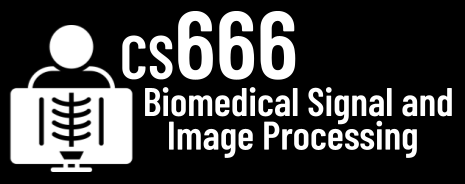
#Assignment 5

In [ ]:
# NAME: Kenichi Maeda

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [3]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-13 14:15:16--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.06s   

2024-04-13 14:15:16 (100 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [ ]:
# Then use the following snippet to extract the data.

In [4]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [ ]:
# TODO: 220

In [ ]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

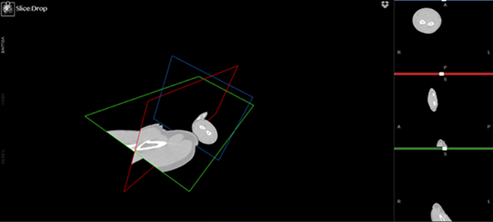

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

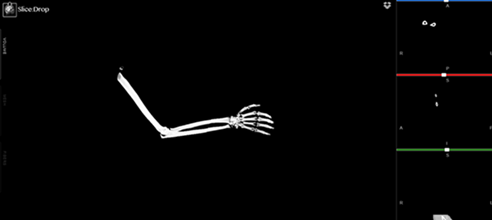

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [6]:
from pydicom import dcmread
import os
import numpy as np

In [7]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

# First, read the dimensions of a single image slice
sample_dicom = dcmread('/content/ct/IM-0001-0001.dcm')
sample_image = sample_dicom.pixel_array

dim = [454, 512, 220]
# Now we know that the size of each slice is (454, 512) and there are 220 slices.
data = np.zeros(dim)

# Get a list of slices
files = sorted(os.listdir("/content/ct"))

i = 0
for file in files:
  dicom = dcmread('/content/ct/' + file)
  image = dicom.pixel_array
  data[:, :, i] = image
  i += 1

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

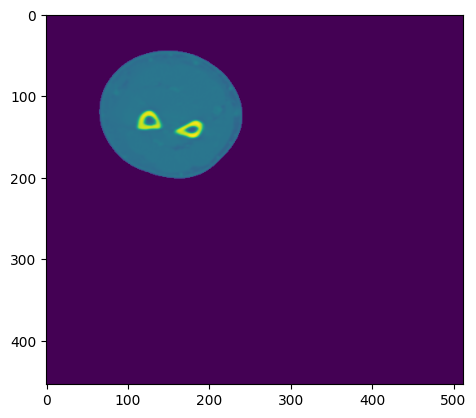

In [8]:
# TODO: YOUR CODE FOR AXIAL
imshow(data[:, :, dim[2]//2])

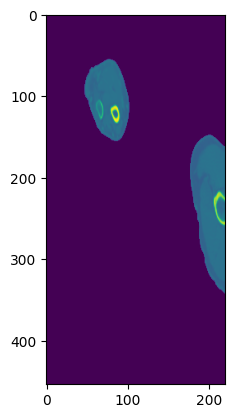

In [9]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(data[:, dim[1]//2, :])

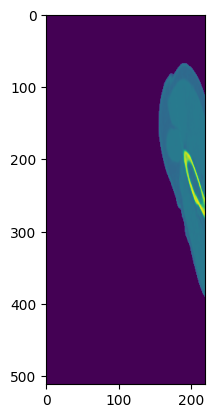

In [10]:
# TODO: YOUR CODE FOR CORONAL
imshow(data[dim[0]//2, :, :])

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [35]:
# Get a list of slices
files = sorted(os.listdir("/content/ct"))

slices = []
for file in files:
  dicom = dcmread('/content/ct/' + file)
  slices.append(dicom)

slice = slices[120]
print(slice[0x0028, 0x1050])
print(slice[0x0028, 0x1051])
print(slice[0x0028, 0x1052])

(0028, 1050) Window Center                       DS: '30.0'
(0028, 1051) Window Width                        DS: '410.0'
(0028, 1052) Rescale Intercept                   DS: '-1024.0'


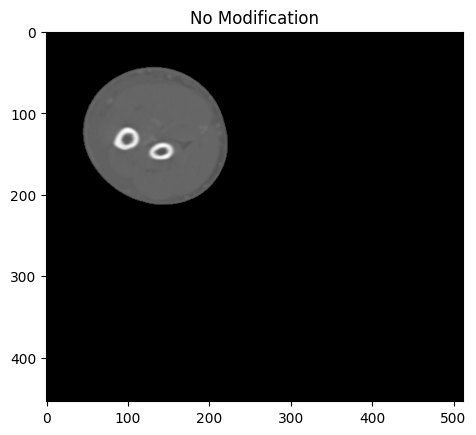

In [36]:
plt.imshow(slice.pixel_array, cmap='gray')
plt.title("No Modification")
plt.show()

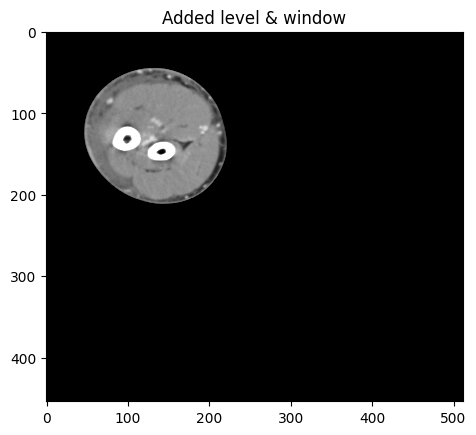

In [38]:
# TODO: YOUR CODE
level = slice.WindowCenter
window = slice.WindowWidth
vmin = level - window/2
vmax = level + window/2
rescale = slice.RescaleIntercept

plt.imshow(slice.pixel_array + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Added level & window")
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

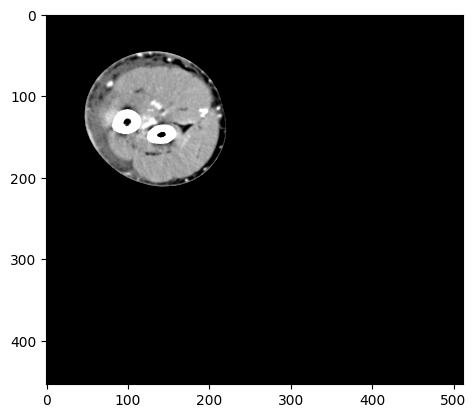

In [39]:
# TODO: YOUR CODE

level = 50
window = 200
vmin = level - window/2
vmax = level + window/2
rescale = -1000

plt.imshow(slice.pixel_array + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [42]:
# TODO: YOUR ANSWER
# The image here represents an arm which mostly consists of soft tissues (or muscles). Therefore,
# we need to enhance the visualization in such a way that soft tissues get highlighted more.
# In window settings, it is said that increasing the window width increase the contrast of the image
# and decreasing the window level will increase the brightness of the image.
# Since I wanted to highlight muscles in the image particularly, I changed level and window to 50 and 200 respectively.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

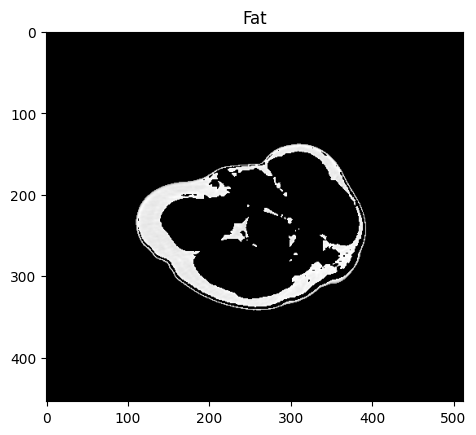

In [43]:
# TODO: YOUR CODE TO SEGMENT FAT
imagevolume = slice.pixel_array
new_mask = imagevolume.copy()
new_mask = image.astype(numpy.int16)
new_mask[new_mask < 300] = 0
new_mask[new_mask > 1000] = 0
plt.title("Fat")
plt.imshow(new_mask, cmap='gray')
plt.show()

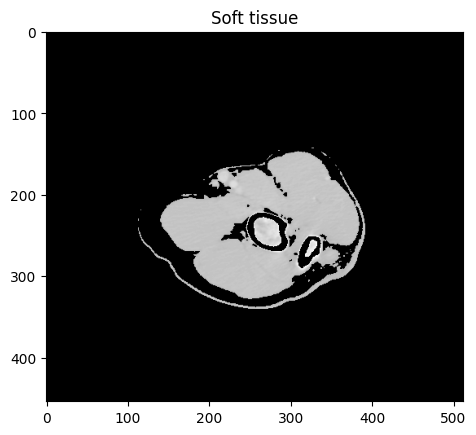

In [44]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
imagevolume = slice.pixel_array
new_mask = imagevolume.copy()
new_mask = image.astype(numpy.int16)
new_mask[new_mask < 1000] = 0
new_mask[new_mask > 1400] = 0

plt.title("Soft tissue")
plt.imshow(new_mask, cmap='gray')
plt.show()

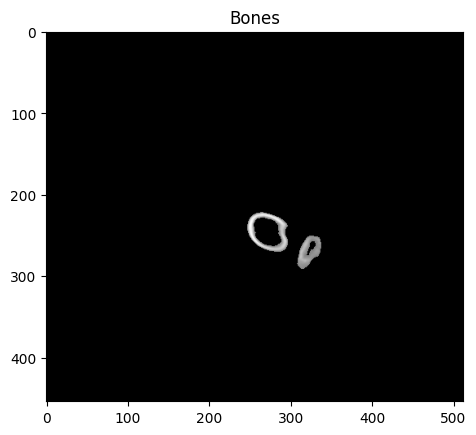

In [45]:
# TODO: YOUR CODE TO SEGMENT BONES
imagevolume = slice.pixel_array
new_mask = imagevolume.copy()
new_mask = image.astype(numpy.int16)
new_mask[new_mask < 1300] = 0

plt.title('Bones')
plt.imshow(new_mask, cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [46]:
# TODO: YOUR ANSWER
# I think so :)

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""